In [51]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
datalog_DIR = '../../data/'

In [53]:
datalogFile = datalog_DIR + '02-27-2019_16-25-42.csv'
#Use error_bad_lines to fill in blanks as NA
#The WallIds should be only to have NaN

df = pd.read_csv(datalogFile, sep=',')
df.head()

,Time,ID,X,Y,Yaw,ResetID,checkCorrectness,NumberOfWalls,WallId(s)
0,0 1000000,0,0.29,0.174,0.22761,15,1,0,NaN
1,0 2000000,0,0.29,0.174,0.22761,15,1,0,NaN
2,0 3000000,0,0.29,0.174,0.22761,15,1,0,NaN
3,0 4000000,0,0.29,0.174,0.22761,15,1,0,NaN
4,0 5000000,0,0.29,0.174,0.22761,15,1,0,NaN


In [54]:
len(df.index)

30031

In [55]:
#Get Velocity Approx by sampling over every 10 ms
ms = 10
velocity = []
position = []
last_x_y = (0,0)
for i in range(0,len(df.index),ms):
    new_velocity = np.sqrt((df.at[i, 'X'] - last_x_y[0])**2 +(df.at[i, 'Y'] - last_x_y[1])**2 ) / (ms/1000)
    new_position = np.sqrt((df.at[i, 'X'] - 0)**2 +(df.at[i, 'Y'] - 0)**2 )
    last_x_y = (df.at[i, 'X'],df.at[i, 'Y'])
    velocity.append(new_velocity)
    position.append(new_position)

In [56]:
velocity

[33.81952099010274,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.049634262359783146,
 0.12791235280456253,
 0.12272546597996907,
 0.1177978352942078,
 0.11285566002642039,
 0.10381680981421401,
 0.09745409175606157,
 0.08846383441836729,
 0.07890253481352799,
 0.0681898086227001,
 0.055384113245589714,
 0.04214356415871309,
 0.030054117854296094,
 0.030612415781836266,
 0.04592602747897859,
 0.05648690113645824,
 0.06866185258205675,
 0.09236693131202244,
 0.13208410199566234,
 0.17952231059118878,
 0.22191137870781005,
 0.27359608915333555,
 0.30250753709618367,
 0.32851430714658353,
 0.34121421424085147,
 0.34307762969916444,
 0.3372001334519295,
 0.3439633265335154,
 0.3485346037339777,
 0.3411261936585935,
 0.3301625357305053,
 0.313154801974999,
 0.29280753064086523,
 0.2716380680243472,
 0.25243906195357474,
 0.234513368488877,
 0.21807177717439366,
 0.20315117523657442,
 0.1987064417677478,
 0.18888634148609287,
 0.18262184973326812,
 0.1860829922373347,
 0.190026445

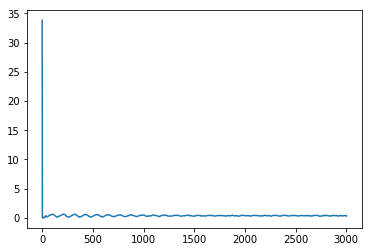

In [57]:
fig, ax = plt.subplots( nrows=1, ncols=1 )
ax.plot(velocity)
plt.show()
fig.savefig('VelocityFull.png')

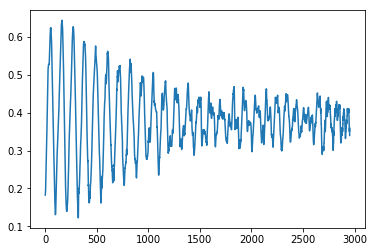

In [58]:
fig, ax = plt.subplots( nrows=1, ncols=1 )
ax.plot(velocity[50:])
plt.show()
fig.savefig('VelocitySub.png')

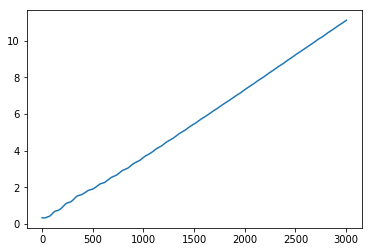

In [59]:
fig, ax = plt.subplots( nrows=1, ncols=1 )
ax.plot(position)
plt.show()
fig.savefig('position.png')